----------
----------

## **Grading Note**: 
### Run this to grade the project, it will take under 10 minutes and the file  ```eda_ML_cancer_genomics_final_scaffa.ipynb``` will do the same but train the models and takes 4-5 days to run. This document uses the trained models from the final notebook.
----------
----------

## **Author and Other Info**: 
Alejandro Scaffa

Final Project 

Apr 22 2025


## **Title**: 
## Cancer Prediction Model (Binary and Multiclass) Trained on TCGA PANCAN Dataset

## **Project Outline**: 
#### This Larger Project has 4 parts: 
#### - Part 1 is the EDA for the Genomic Dataset, 
#### - Part 2 is the ML Pipeline needed to get the data in order to train the models, 
#### - Part 3 is the ML Pipeline to train and select the binary classification model, 
#### - Part 4 is the ML Pipeline to train and select the multiclass classification model. Those are shown in ```eda_ML_cancer_genomics_final_scaffa.ipynb```. 

## **Grading Document Outline**: 
#### The Grading Document below is split into two Parts:
#### - Part A Binary Prediction Model For Whether Cancer or Not (99% accuracy)
#### - Part B Multiclass Prediction Model for Cancer Type (97.6% accuracy). 

#### The code below is the result of the search for the best models using gridsearch and cross validation. The result is two stacking models of logistics regression with XGBoost.

## File Dependencies:
In order for this code to run the following files need to be in the same directory:
 - final_binary_cancer_prediction_dataset.csv
 - variance_threshold_scores.csv
 - final_multiclass_cancer_prediction_dataset.csv
 - X_binary_test_scaled.joblib
 - y_binary_test.joblib
 - best_stacking_binary_model.pkl
 - X_multiclass_test_scaled.joblib
 - y_multiclass_test.joblib
 - best_stacking_multiclass_cancer_model.pkl
 - cancer_type_decoder_map.joblib


---------------

## Part A: Binary Prediction Model For Whether Cancer or Not (99% accuracy)

**WHAT IT DOES**: This code is a machine learning model that predicts whether a patient has cancer based on their genomic data. The model is trained on a dataset called PANCAN (Pan-cancer 33 types, >10000 patients) and uses a variety of features to make predictions. The model is evaluated using accuracy, precision, recall, and F1 score. The model being shown here is the result from the search of the best models using gridsearch and cross validation. The result is a stacking model of logistics regression with XGBoost and has a 99% accuracy.

In [1]:
#------------------FINAL PREDICTION AND EVALUATION-----------------
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve)
import numpy as np


#Load full dataset
df = pd.read_csv('final_binary_cancer_prediction_dataset.csv')

#extract target, Normal = 0 and Tumor = 1
y_binary = df['sample_type_encoded']

#Loading the test dataset that has already been scaled and split
X_binary_test_scaled = joblib.load('X_binary_test_scaled.joblib')
y_binary_test = joblib.load('y_binary_test.joblib')

#Load best variance threshold from saved scores
variance_threshold_scores = pd.read_csv('variance_threshold_scores.csv')
thresholds = variance_threshold_scores['Threshold'].values
binary_scores = variance_threshold_scores['Binary_Score'].values
best_threshold_binary = thresholds[np.argmax(binary_scores)]
print(f'Best Variance Threshold for Binary Cancer Dataset: {best_threshold_binary}')

#Load saved stacking model
stacking_binary_model = joblib.load('best_stacking_binary_model.pkl')

#Predict using the loaded model
y_pred = stacking_binary_model.predict(X_binary_test_scaled)
y_proba = stacking_binary_model.predict_proba(X_binary_test_scaled)[:, 1]

#Evaluating final results to the known labels
accuracy = accuracy_score(y_binary_test, y_pred)
auc = roc_auc_score(y_binary_test, y_proba)
print(f'\nAccuracy: {accuracy:.4f}')
print(f'ROC AUC: {auc:.4f}\n')



Best Variance Threshold for Binary Cancer Dataset: 0.0499999999999999

Accuracy: 0.9932
ROC AUC: 0.9909



------ CLASSIFICATION REPORT: STACKING MODEL ------
              precision    recall  f1-score   support

      Normal       0.97      0.92      0.95       144
       Tumor       0.99      1.00      1.00      2049

    accuracy                           0.99      2193
   macro avg       0.98      0.96      0.97      2193
weighted avg       0.99      0.99      0.99      2193



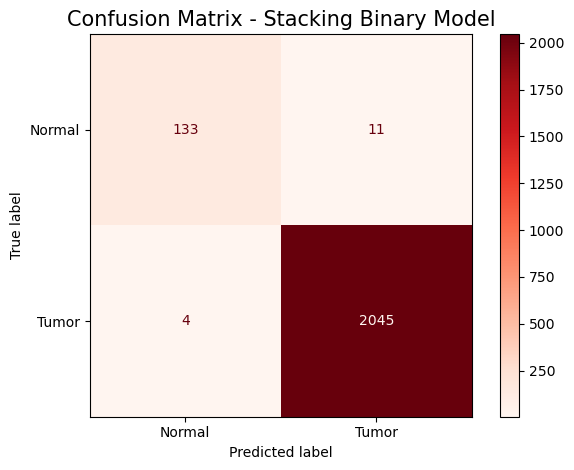

In [2]:
#Printing classification report
print("------ CLASSIFICATION REPORT: STACKING MODEL ------")
print(classification_report(y_binary_test, y_pred, target_names=['Normal', 'Tumor']))

#Plotting out the confusion matrix for the final stacking model
cm = confusion_matrix(y_binary_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Tumor'])
disp.plot(cmap='Reds', values_format='d')
plt.title('Confusion Matrix - Stacking Binary Model', fontsize=15)
plt.tight_layout()
plt.savefig('confusion_matrix_stacking_final_model.png')
plt.show()



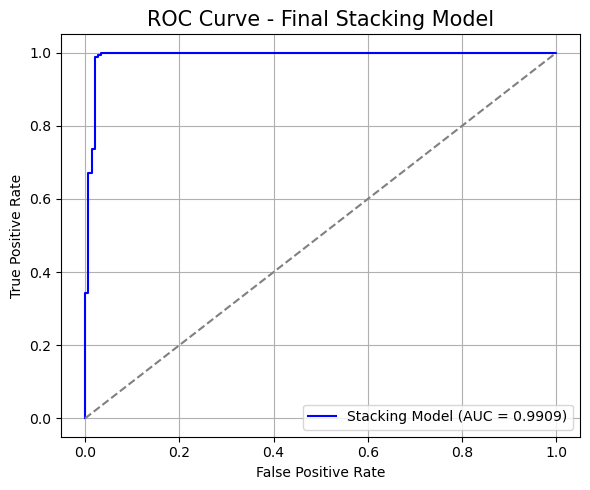

In [3]:
#and now theROC Curve
falseposr, trueposr, _ = roc_curve(y_binary_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(falseposr, trueposr, label=f'Stacking Model (AUC = {auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Stacking Model', fontsize=15)
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.savefig('roc_curve_stacking_final_model.png')
plt.show()



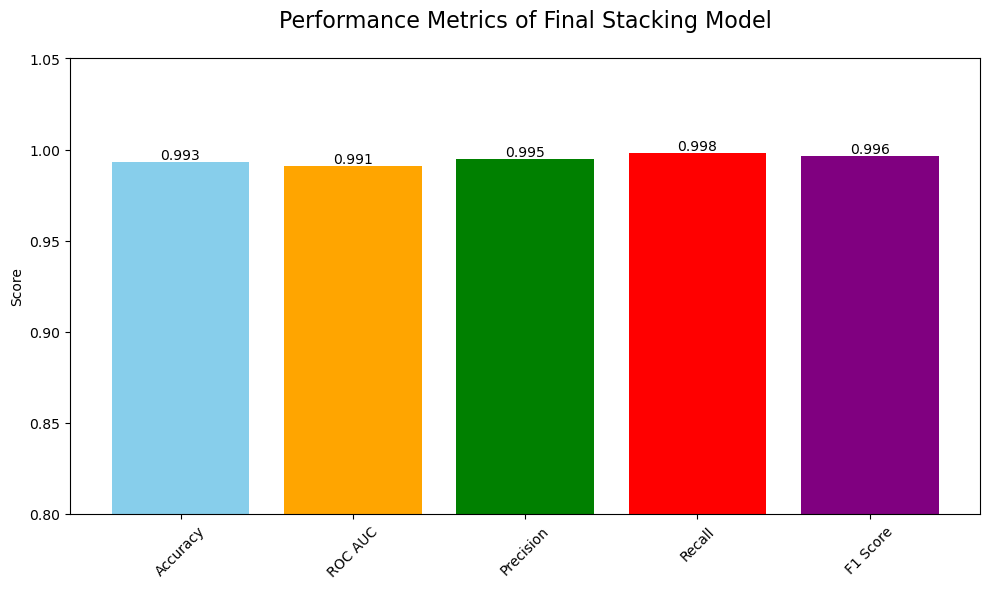

In [6]:
#plotting the accuracy the ROC AUC, the Precision, the Recall, and the F-1 Score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_binary_test, y_pred)
recall = recall_score(y_binary_test, y_pred)
f1 = f1_score(y_binary_test, y_pred)
# Plotting the metrics
metrics = [accuracy, auc, precision, recall, f1]
metric_names = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Performance Metrics of Final Stacking Model', fontsize=16, y=1.05)
for i, value in enumerate(metrics):
    plt.text(i, value, f"{value:.3f}", ha='center', va='bottom', fontsize=10, color='black')
plt.ylim(0.8, 1.05)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('performance_metrics_stacking_final_model.png')
plt.show()


--------------------

## Part B: Multiclass Prediction Model For Which Type of Cancer It Is (97.6% accuracy)
- Without knowledge of the location of the biopsy

**WHAT IT DOES**: This code is a machine learning model that predicts the type of cancer a patient has based on their genomic data. The model is trained on a dataset called PANCAN (Pan-cancer 33 types, >10000 patients) and uses a variety of features to make predictions. The model is evaluated using accuracy, precision, recall, and F1 score. The model being shown here is the result from the search of the best models using gridsearch and cross validation. The result is a stacking model of logistics regression with XGBoost and has a 97.6% accuracy.

In [7]:
#Load full dataset
df_multiclass = pd.read_csv('final_multiclass_cancer_prediction_dataset.csv')

#Extrac the multiclass target
y_multiclass = df_multiclass['cancer_type_encoded']

#Loading the test dataset for multiclass
X_multiclass_test_scaled = joblib.load('X_multiclass_test_scaled.joblib')
y_multiclass_test = joblib.load('y_multiclass_test.joblib')

#Load best variance threshold from saved scores
variance_threshold_scores = pd.read_csv('variance_threshold_scores.csv')
thresholds = variance_threshold_scores['Threshold'].values
multiclass_scores = variance_threshold_scores['Multiclass_Score'].values

#Using the lowest variance of best threshold for multiclass
top_5_scores = 5
top_5_indices = np.argsort(multiclass_scores)[-top_5_scores:]
best_threshold_multiclass_adjusted = np.min(thresholds[top_5_indices])
print(f'Best Variance Threshold for Multiclass Cancer Dataset: {best_threshold_multiclass_adjusted}')

#Loading the saved stacking model for multiclass
stacking_multiclass_model = joblib.load('best_stacking_multiclass_cancer_model.pkl')

#Predicting using the loaded model
y_multiclass_pred = stacking_multiclass_model.predict(X_multiclass_test_scaled)
y_multiclass_proba = stacking_multiclass_model.predict_proba(X_multiclass_test_scaled)


#Evaluating final results to the known labels
multiclass_accuracy = accuracy_score(y_multiclass_test, y_multiclass_pred)
multiclass_auc = roc_auc_score(y_multiclass_test, y_multiclass_proba, multi_class='ovr', average='weighted')
print(f'\nMulticlass Accuracy: {multiclass_accuracy:.4f}')
print(f'Multiclass ROC AUC: {multiclass_auc:.4f}\n')


Best Variance Threshold for Multiclass Cancer Dataset: 0.2299999999999999

Multiclass Accuracy: 0.9756
Multiclass ROC AUC: 0.9997



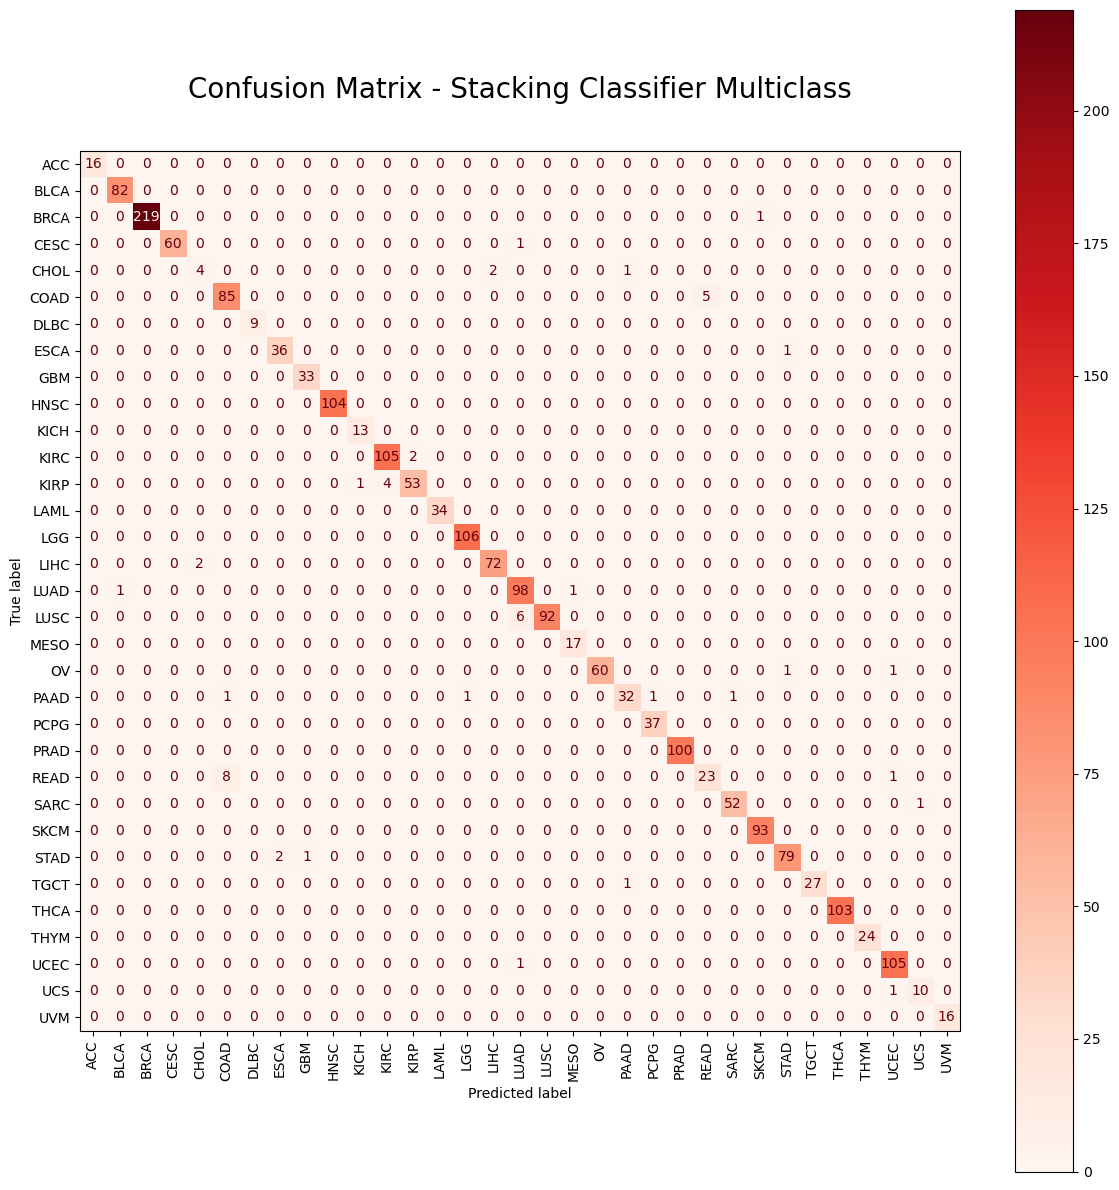

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Confusion matrix with actual cancer names from the originaly saved map to the data:
#Loading map 
loaded_cancer_type_map = joblib.load('cancer_type_decoder_map.joblib')

#Get the key with the value from the loaded map
reversed_cancer_type_map = {v: k for k, v in loaded_cancer_type_map.items()}

finished_cancer_labels = []
cancer_class_number_labels = []
for label in np.unique(y_multiclass_test):
    cancer_class_number_labels.append(str(label))
    
for label in cancer_class_number_labels:
    finished_cancer_labels.append(reversed_cancer_type_map[int(label)])

# Compute confusion matrix
cm_stacking_multiclass = confusion_matrix(y_multiclass_test, y_multiclass_pred)

# Create a larger figure and pass the axis
fig, ax = plt.subplots(figsize=(12, 12))

# Create the display object and plot it on the given axis
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacking_multiclass, display_labels=finished_cancer_labels)

disp.plot(ax=ax, cmap='Reds', values_format='d', xticks_rotation=90)

# Update title and save
ax.set_title('Confusion Matrix - Stacking Classifier Multiclass', fontsize=20, y=1.05)
plt.tight_layout()
plt.savefig('confusion_matrix_stacking_multiclass.png')
plt.show()


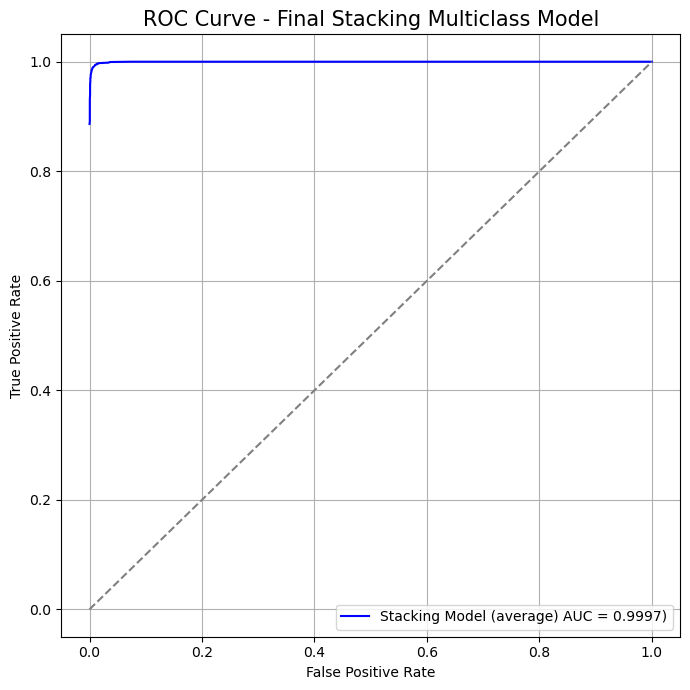

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


#Step 1: Binarizing the multiclass labels (this is a headache for ROC curve in multiclasses)
y_multiclass_test_binarized = label_binarize(y_multiclass_test, classes=np.unique(y_multiclass_test))
n_classes = y_multiclass_test_binarized.shape[1]

#Create dicts for false positive rates, true positive rates, and AUC scores
falseposr = dict()
trueposr = dict()
auc_score = dict()

#Step 2: Compute ROC curve and AUC for each class
for i in range(n_classes):
    falseposr[i], trueposr[i], _ = roc_curve(y_multiclass_test_binarized[:, i], y_multiclass_proba[:, i])
    auc_score[i] = auc(falseposr[i], trueposr[i])

#Step 3: Compute the average ROC curve and AUC since we have 32 classes and 32 ROC curves otherise.
all_falseposr_list = []
for i in range(n_classes):
    all_falseposr_list.append(falseposr[i])

#Concatenate all false positive rates into a single array and sort them
all_falseposr_array = np.concatenate(all_falseposr_list)
all_falseposr = np.unique(all_falseposr_array)  #Get the unique falsepostive rates

mean_trueposr = np.zeros_like(all_falseposr)

for i in range(n_classes):
    added_trueposr = np.interp(all_falseposr, falseposr[i], trueposr[i])
    mean_trueposr += added_trueposr  #Sum the interpolated true positive rates

#Normalizing the mean true positive rates by the number of classes
mean_trueposr /= n_classes

#Calculating the average AUC for the macro-averaged ROC curve
average_macro_auc = auc(all_falseposr, mean_trueposr)

#Step 4: Plot
plt.figure(figsize=(7, 7))
plt.plot(all_falseposr, mean_trueposr, label=f'Stacking Model (average) AUC = {average_macro_auc:.4f})', color='blue')
#random classifier diagnoal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Stacking Multiclass Model', fontsize=15)
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.savefig('roc_curve_stacking_final_multiclass_model.png')
plt.show()


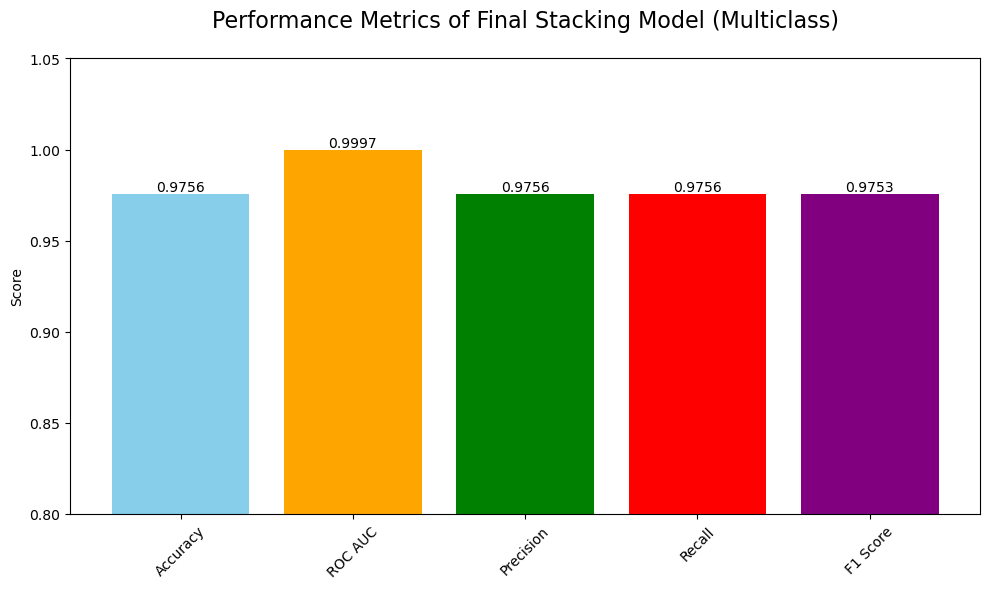

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

#Getting the metrics for the multiclass model
accuracy = accuracy_score(y_multiclass_test, y_multiclass_pred)
auc_score = roc_auc_score(y_multiclass_test, y_multiclass_proba, multi_class='ovr', average='weighted')
precision = precision_score(y_multiclass_test, y_multiclass_pred, average='weighted')
recall = recall_score(y_multiclass_test, y_multiclass_pred, average='weighted')
f1 = f1_score(y_multiclass_test, y_multiclass_pred, average='weighted')

# Prepare values and labels
metrics = [accuracy, auc_score, precision, recall, f1]
metric_names = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1 Score']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metrics, color=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Performance Metrics of Final Stacking Model (Multiclass)', fontsize=16, y=1.05)
for i, value in enumerate(metrics):
    plt.text(i, value, f"{value:.4f}", ha='center', va='bottom', fontsize=10, color='black')
plt.ylim(0.8, 1.05)
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('performance_metrics_stacking_final_model_multiclass.png')
plt.show()


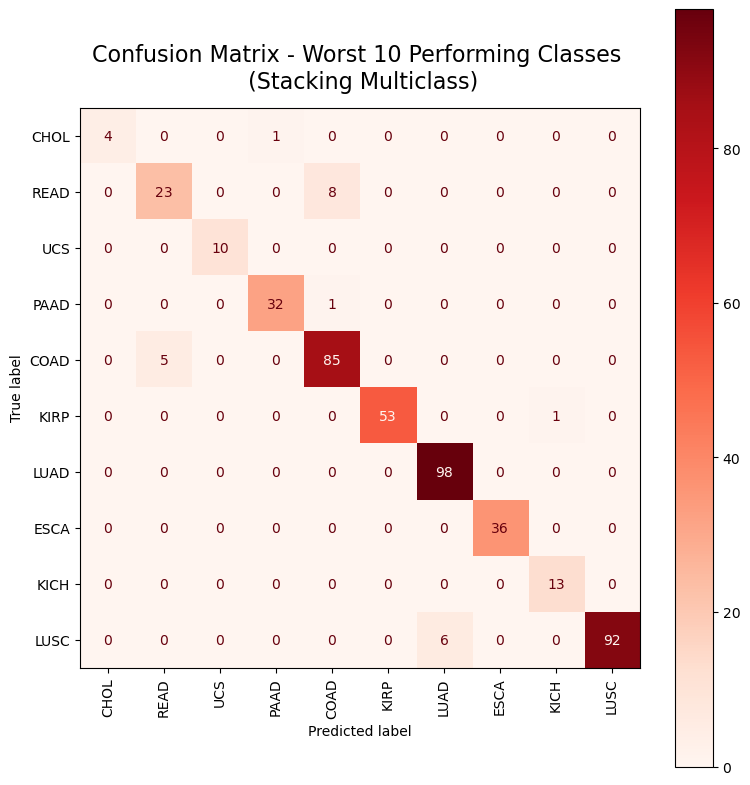

In [11]:
report_dict = classification_report(y_multiclass_test, y_multiclass_pred, output_dict=True)
f1_scores = {}
for label in report_dict:
    if label not in ['accuracy', 'macro avg', 'weighted avg']:
        f1_scores[label] = report_dict[label]['f1-score']
        
#Step: Sort by worst F1-score
sorted_classes = sorted(f1_scores, key=f1_scores.get)
worst_classes = sorted_classes[:15]  #Getting the 15 worst performing classes
best_classes = sorted_classes[-15:] #Getting the 15 best performing classes
worst_classes_indexes = [int(label) for label in worst_classes]
best_classes_indexes = [int(label) for label in best_classes]
worst_classes_labels = []
best_classes_labels = []
for i in range(len(worst_classes_indexes)):
    worst_classes_labels.append(reversed_cancer_type_map[worst_classes_indexes[i]])
    best_classes_labels.append(reversed_cancer_type_map[best_classes_indexes[i]])
    

#Plotting the worst 10 performing classes
worst_classes_labels = worst_classes_labels[:10]  
worst_classes_indexes = worst_classes_indexes[:10]  

fig, ax = plt.subplots(figsize=(8, 8))
disp_worst_5 = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_multiclass_test, y_multiclass_pred, labels=worst_classes_indexes),
    display_labels=worst_classes_labels
)
disp_worst_5.plot(ax=ax, cmap='Reds', values_format='d', xticks_rotation=90)
ax.set_title('Confusion Matrix - Worst 10 Performing Classes \n (Stacking Multiclass)', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig('confusion_matrix_worst_10_performing_classes_stacking_multiclass.png')
plt.show()



#### Worst 10 and Best 10 Performing Classes in the Multiclass Model
#### Shows that CHOL/READ/UCS are the worst performing classes, they are also the ones with the least amount of data and the most similar cancers in terms of biological similarity. This leaves room for improvement, starting by gathering more data for those classes that can be found in other TCGA datasets.

In [12]:
#Print the worst 10 performer
print("Worst Performing Classes and their F1-scores:")
for label in worst_classes[0:10]:
    print(f"Class: {reversed_cancer_type_map[int(label)]}, F1-score: {f1_scores[label]:.4f}")

Worst Performing Classes and their F1-scores:
Class: CHOL, F1-score: 0.6154
Class: READ, F1-score: 0.7667
Class: UCS, F1-score: 0.9091
Class: PAAD, F1-score: 0.9143
Class: COAD, F1-score: 0.9239
Class: KIRP, F1-score: 0.9381
Class: LUAD, F1-score: 0.9515
Class: ESCA, F1-score: 0.9600
Class: KICH, F1-score: 0.9630
Class: LUSC, F1-score: 0.9684


In [13]:
#Print the best 10 performers
print("\nBest Performing Classes and their F1-scores:")
for label in best_classes[-10:]:
    print(f"Class: {reversed_cancer_type_map[int(label)]}, F1-score: {f1_scores[label]:.4f}")


Best Performing Classes and their F1-scores:
Class: LGG, F1-score: 0.9953
Class: BRCA, F1-score: 0.9977
Class: ACC, F1-score: 1.0000
Class: DLBC, F1-score: 1.0000
Class: HNSC, F1-score: 1.0000
Class: LAML, F1-score: 1.0000
Class: PRAD, F1-score: 1.0000
Class: THCA, F1-score: 1.0000
Class: THYM, F1-score: 1.0000
Class: UVM, F1-score: 1.0000
